## CS22B1093 ROHAN G

---------------

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_csv("auto_mpg.csv")

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [111]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [112]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

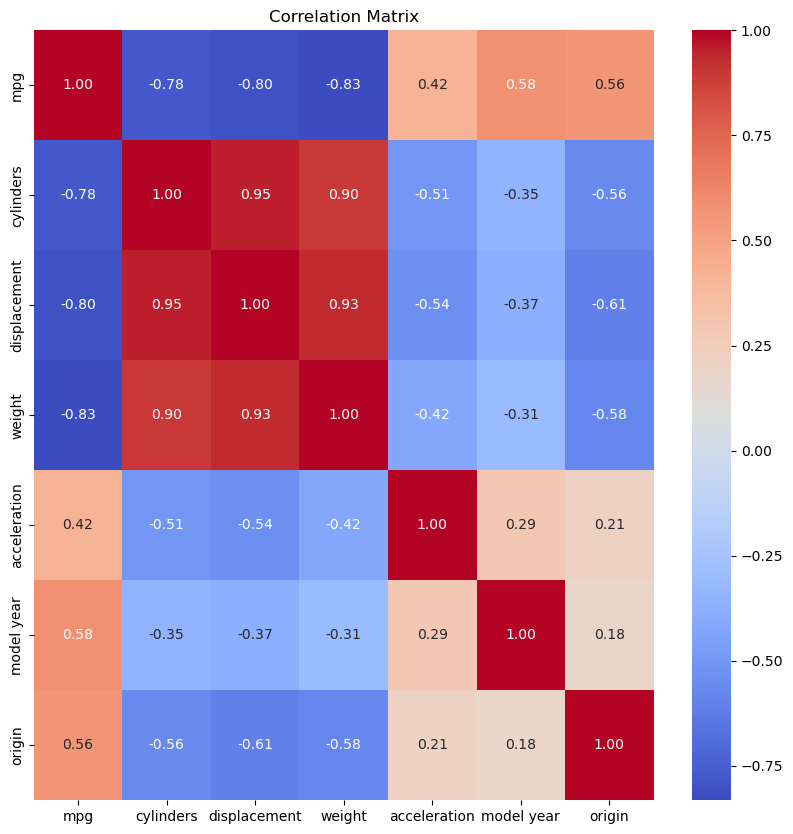

In [113]:
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### The highest correlation of mpg with other column is weight , i.e negatively correlated = -0.83 , so we can conisder as the most suitable independent variable

In [114]:
X = df['weight'].values
y = df['mpg'].values

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

In [115]:
X = np.c_[np.ones(X.shape[0]), X]

In [116]:
m = np.zeros(X.shape[1])
learning_rate = 0.01
epochs = 1000
n = len(y)

In [117]:
for _ in range(epochs):
    y_pred = np.dot(X, m)
    error = y_pred - y
    gradient = (1/n) * np.dot(X.T, error)
    m -= learning_rate * gradient

In [118]:
y_pred = np.dot(X, m)

In [119]:
mse = np.mean((y - y_pred) ** 2)
r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

In [120]:
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Model Coefficients (Intercept, Slope):", m)

Mean Squared Error: 0.30820702125517635
R2 Score: 0.6917929787448236
Model Coefficients (Intercept, Slope): [-5.66046372e-17 -8.31705026e-01]


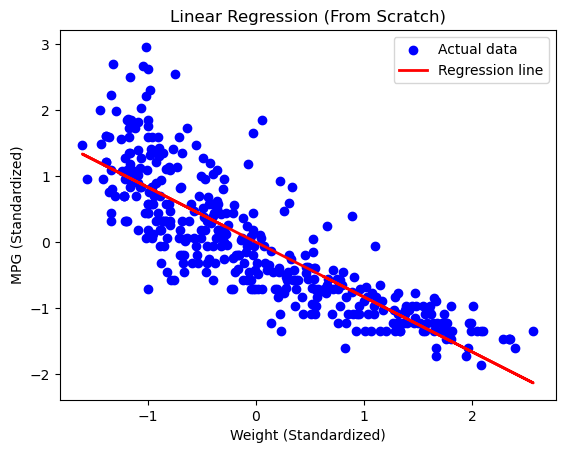

In [121]:
plt.scatter(X[:, 1], y, color='blue', label='Actual data')  # X[:, 1] removes bias term for plotting
plt.plot(X[:, 1], y_pred, color='red', linewidth=2, label='Regression line')
plt.title("Linear Regression (From Scratch)")
plt.xlabel("Weight (Standardized)")
plt.ylabel("MPG (Standardized)")
plt.legend()
plt.show()

-----------